In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
   #######    TOP THREE HIGHEST RUNS SCORER  IN TOP SIX CITIES WITH HIGHEST NUMBER OF MATCHES PLAYED    #########

In [210]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

# merging these two data sets
full_match=delivery.merge(match,left_on='match_id',right_on='id')

# finding top three highest scorer
top_batsman=full_match.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(3).index.tolist()

# now creating a dataframe with only top three batsman
top_batsman_df=full_match[full_match["batsman"].isin(top_batsman)]

#finding top 6 cities
#num_matches=(match["city"].value_counts()).reset_index().rename(columns={"city":"count of matches","index":"city"})

top_city=(match["city"].value_counts()).reset_index().rename(columns={"city":"count of matches","index":"city"}).head(6)["city"].tolist()

# updating top_batsman_df with top cities
top_batsman_df=top_batsman_df[top_batsman_df["city"].isin(top_city)]

#updating top_batsman_df with the runs scored by top batsman in these cities
top_batsman_df=top_batsman_df.groupby(["batsman","city"])["batsman_runs"].sum().reset_index()

# three different dataframe for three batsmen

first_batsman=top_batsman_df[top_batsman_df["batsman"]==top_batsman[0]]
second_batsman=top_batsman_df[top_batsman_df["batsman"]==top_batsman[1]]
third_batsman=top_batsman_df[top_batsman_df["batsman"]==top_batsman[2]]

Text(0.5, 1, 'Top 10 batmen vs Top 10 bowlers ')

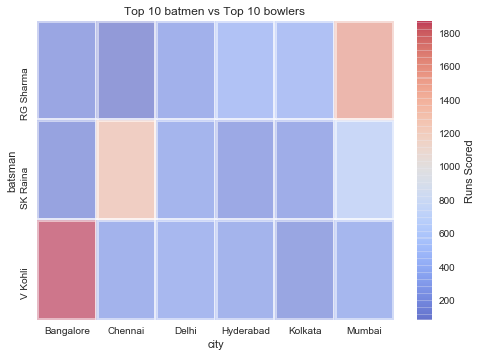

In [211]:
# plotting heatmap

pivot=top_batsman_df.pivot_table(index="batsman",columns="city",values="batsman_runs")

sns.heatmap(pivot,linewidth=3,cmap='coolwarm',alpha=0.5, 
            cbar_kws={'label': 'Runs Scored'}).set_title("Top 10 batmen vs Top 10 bowlers ")

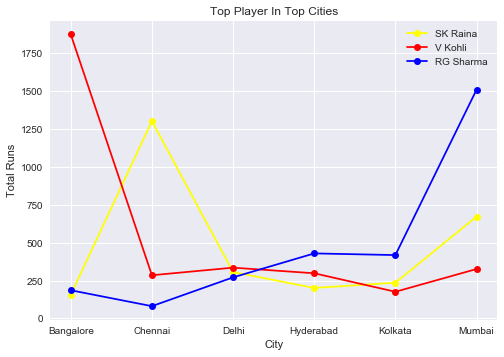

In [212]:
# plotting the line graph

plt.style.use("seaborn")
plt.plot(first_batsman["city"],first_batsman["batsman_runs"],label=top_batsman[0],marker='o',color="yellow")
plt.plot(second_batsman["city"],second_batsman["batsman_runs"],label=top_batsman[1],marker='o',color="red")
plt.plot(third_batsman["city"],third_batsman["batsman_runs"],label=top_batsman[2],marker="o",color="blue")
plt.xlabel("City")
plt.ylabel("Total Runs")
plt.title("Top Player In Top Cities")
plt.legend()